In [1]:
import pandas as pd
data = pd.read_csv('Static_dataset.csv')

In [2]:
print(data.shape)
data.head()

(268074, 16)


,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [3]:
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [4]:
data['Target Attack'].value_counts()

Target Attack
1    147179
0    120895
Name: count, dtype: int64

In [5]:
numerics = ['int16', 'int32', 'int64']
numerical = data.select_dtypes(include=numerics)
print(numerical)

        FQDN_count  subdomain_length  upper  lower  numeric  special  labels  \
0               27                10      0     10       11        6       6   
1               27                10      0     10       11        6       6   
2               26                 9      0     10       10        6       6   
3               27                10      0     10       11        6       6   
4               15                 9      0     11        0        4       3   
...            ...               ...    ...    ...      ...      ...     ...   
268069          18                 3      0     16        0        2       3   
268070          27                10      0     10       11        6       6   
268071          27                10      0     10       11        6       6   
268072          16                 0      0     14        0        2       2   
268073          27                10      0     10       11        6       6   

        labels_max  len  subdomain  Tar

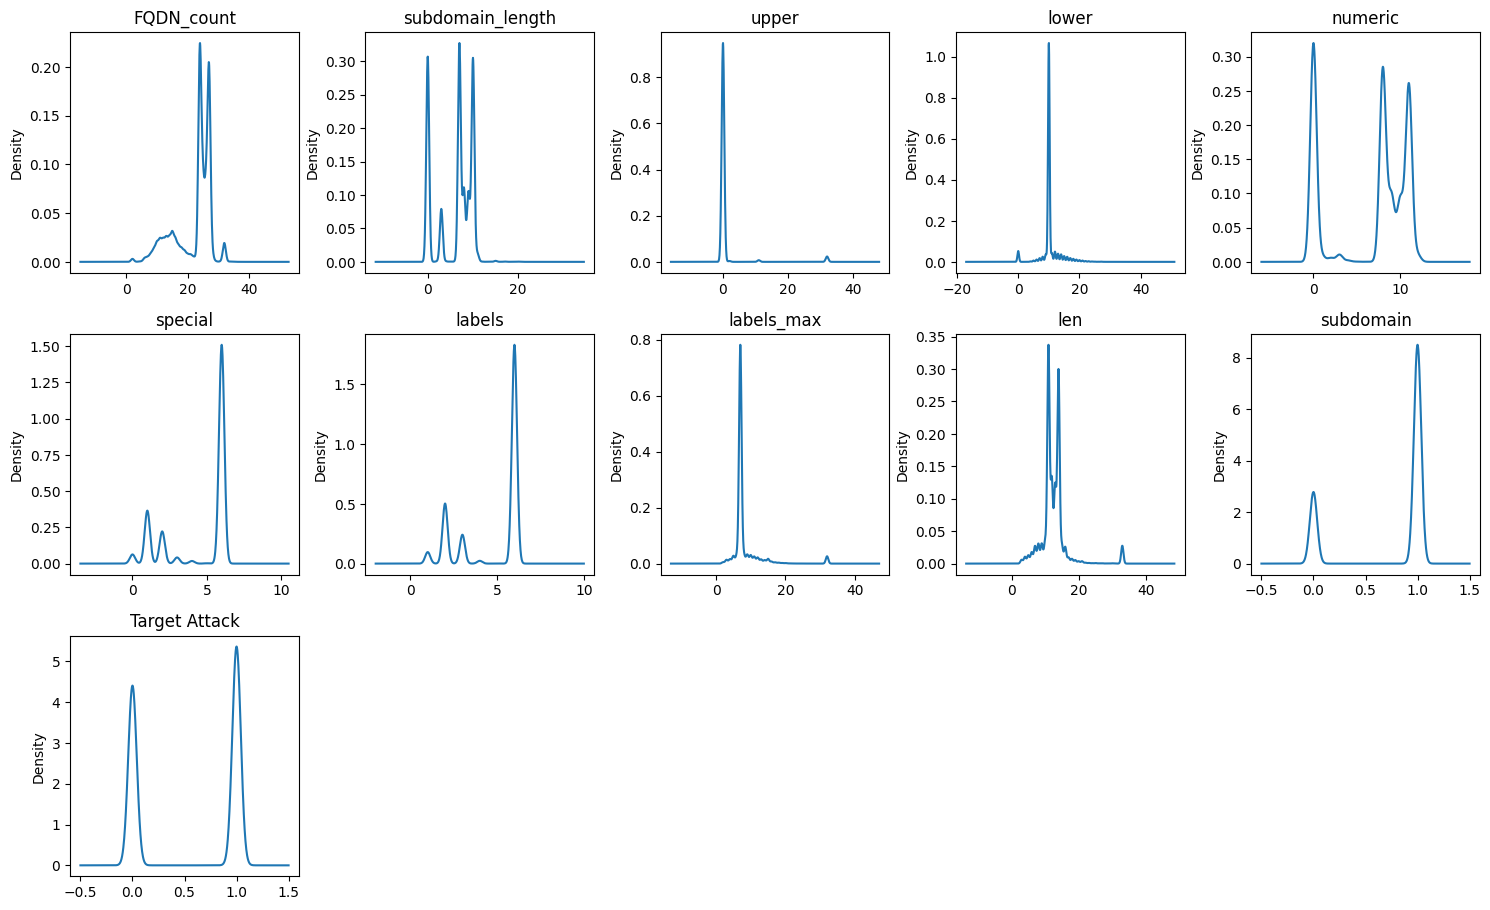

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

for i,column in enumerate(numerical,1):
    plt.subplot(5,5,i)
    data[column].plot(kind = 'kde', title= column)
plt.tight_layout()
plt.show()    

In [7]:
doubles = ['float','double']
doubles = data.select_dtypes(include=doubles)
print(doubles)

         entropy  labels_average
0       2.570417        3.666667
1       2.767195        3.666667
2       2.742338        3.500000
3       2.570417        3.666667
4       2.929439        4.333333
...          ...             ...
268069  2.338623        5.333333
268070  2.767195        3.666667
268071  2.767195        3.666667
268072  3.249687        7.500000
268073  2.570417        3.666667

[268074 rows x 2 columns]


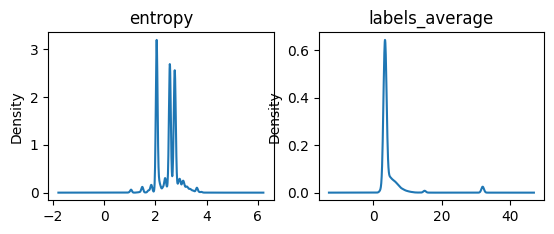

In [8]:
for i,column in enumerate(doubles,1):
    plt.subplot(2,2,i)
    data[column].plot(kind = 'kde', title= column)
plt.tight_layout
plt.show()   

In [9]:
string = ['string','object']
string = data.select_dtypes(include=string)
print(string)

       timestamp longest_word            sld
0        56:19.8            2            192
1        07:23.9            2            192
2        23:15.1            2            192
3        04:51.9            2            192
4        12:44.0        local          local
...          ...          ...            ...
268069   33:51.5         alma     almaalomah
268070   36:02.5            2            192
268071   37:21.5            2            192
268072   24:25.1        radio  radio-vintage
268073   20:56.1            2            192

[268074 rows x 3 columns]


array([[<Axes: title={'center': 'FQDN_count'}>,
        <Axes: title={'center': 'subdomain_length'}>,
        <Axes: title={'center': 'upper'}>,
        <Axes: title={'center': 'lower'}>],
       [<Axes: title={'center': 'numeric'}>,
        <Axes: title={'center': 'entropy'}>,
        <Axes: title={'center': 'special'}>,
        <Axes: title={'center': 'labels'}>],
       [<Axes: title={'center': 'labels_max'}>,
        <Axes: title={'center': 'labels_average'}>,
        <Axes: title={'center': 'len'}>,
        <Axes: title={'center': 'subdomain'}>],
       [<Axes: title={'center': 'Target Attack'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

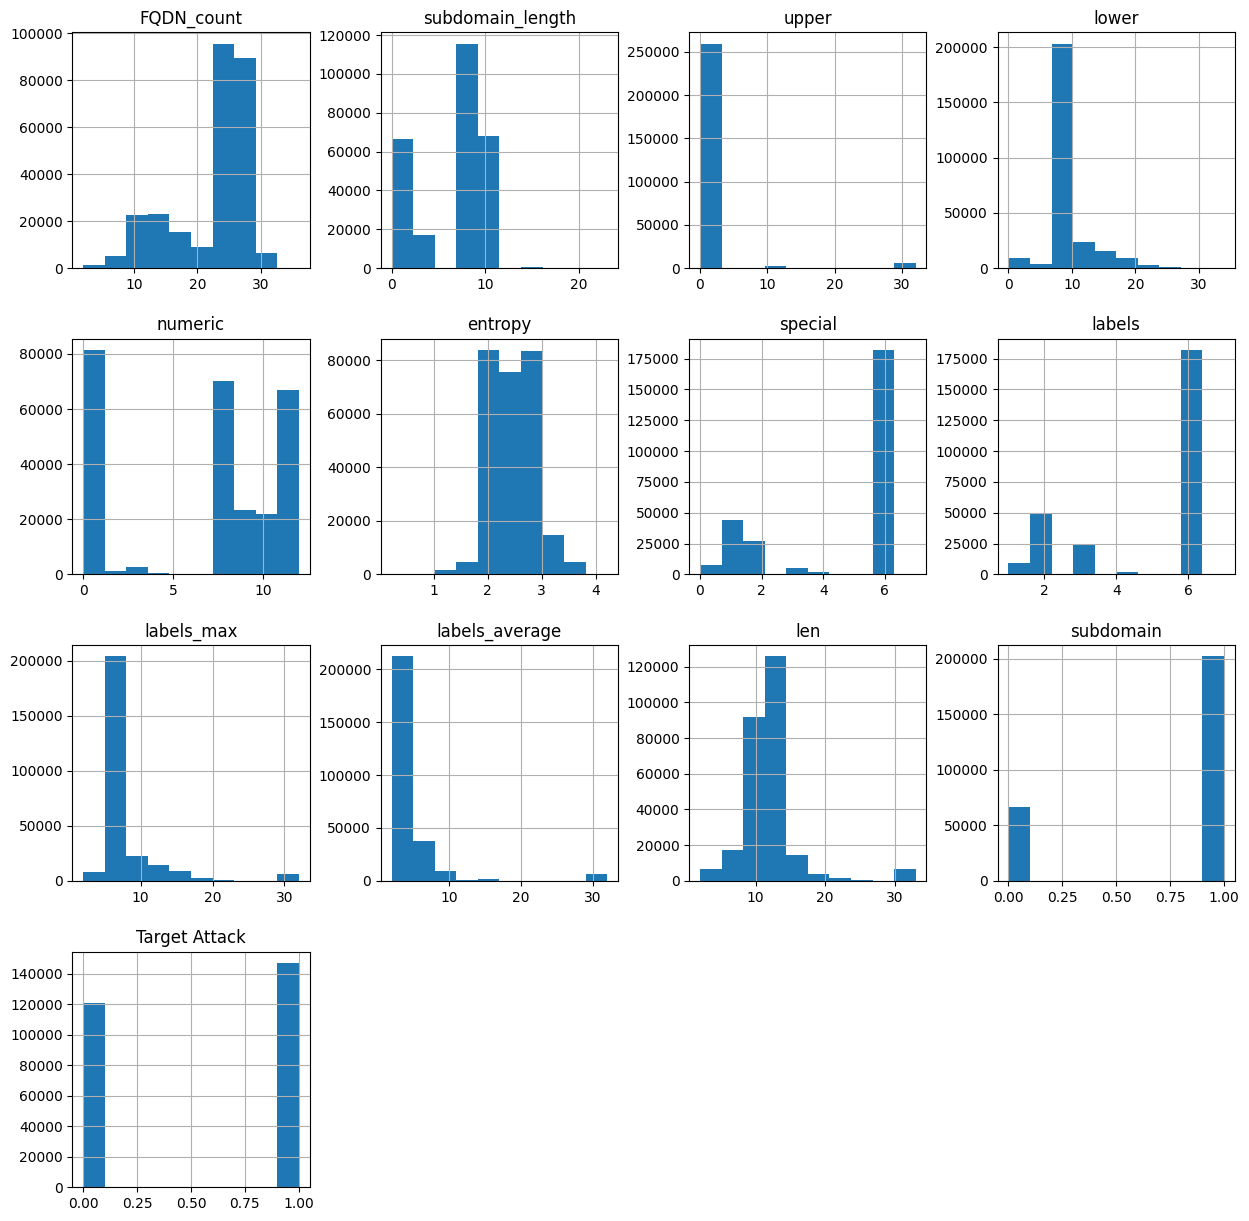

In [10]:
data.hist(figsize=(15,15))

In [11]:
data.dropna( inplace=True)
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [12]:
X = data.drop(columns=['Target Attack',"timestamp"])
y = data['Target Attack']

In [13]:
sld_mode_v=int(data["sld"].mode()[0])
longest_word_mode_v=int(data["longest_word"].mode()[0])
data['longest_word'] = data['longest_word'].replace(r'(([a-z]+)|([A-Z]+))',sld_mode_v, regex=True)
data['longest_word']=data['longest_word'] .astype('int')
data['sld'] = data['sld'].replace(r'(([a-z]+)|([A-Z]+|(0-1)))',longest_word_mode_v, regex=True)
data['sld']=data['sld'] .astype('int')

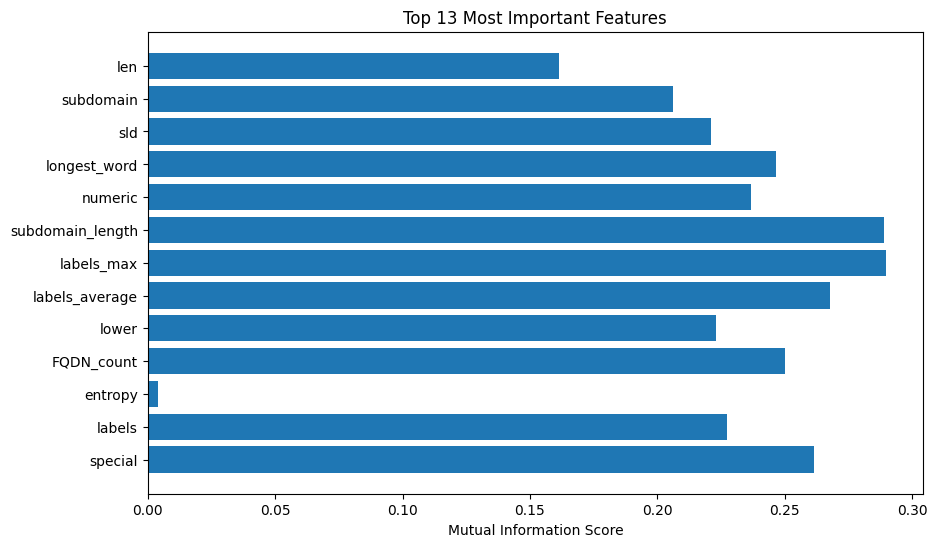

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif,f_classif,chi2
X = data.drop(columns=['Target Attack',"timestamp"])
y = data['Target Attack']

mi = mutual_info_classif(X, y)
k_best = SelectKBest(mutual_info_classif, k='all')
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
sorted_feature_names = [x for _, x in sorted(zip(feature_scores, selected_feature_names), reverse=True)]

top_feature_names = sorted_feature_names[:-1]
top_feature_scores = feature_scores[k_best.get_support()][:-1]
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names,top_feature_scores )
plt.xlabel('Mutual Information Score')
plt.title('Top 13 Most Important Features')
plt.gca()
plt.show()


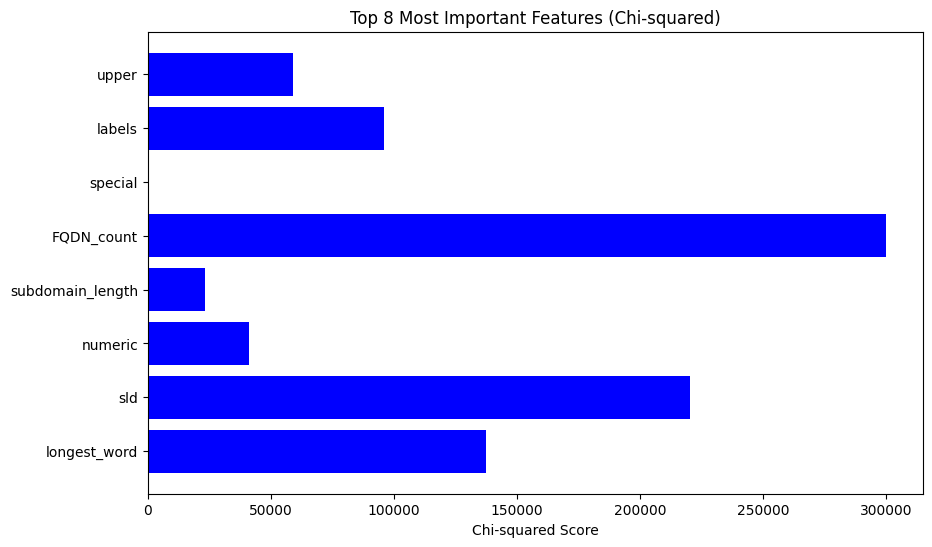

In [15]:
X = data.drop(columns=['Target Attack',"timestamp"])
y = data['Target Attack']
k_best = SelectKBest(chi2, k='all')
k_best.fit(X, y)
chi2_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
sorted_feature_names = [x for _, x in sorted(zip(chi2_scores, selected_feature_names), reverse=True)]
num_features_to_plot = 8
top_feature_names = sorted_feature_names[:num_features_to_plot]
top_chi2_scores = chi2_scores[k_best.get_support()][:num_features_to_plot]


plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_chi2_scores, color='blue')
plt.xlabel('Chi-squared Score')
plt.title('Top {} Most Important Features (Chi-squared)'.format(num_features_to_plot))
plt.gca()
plt.show()


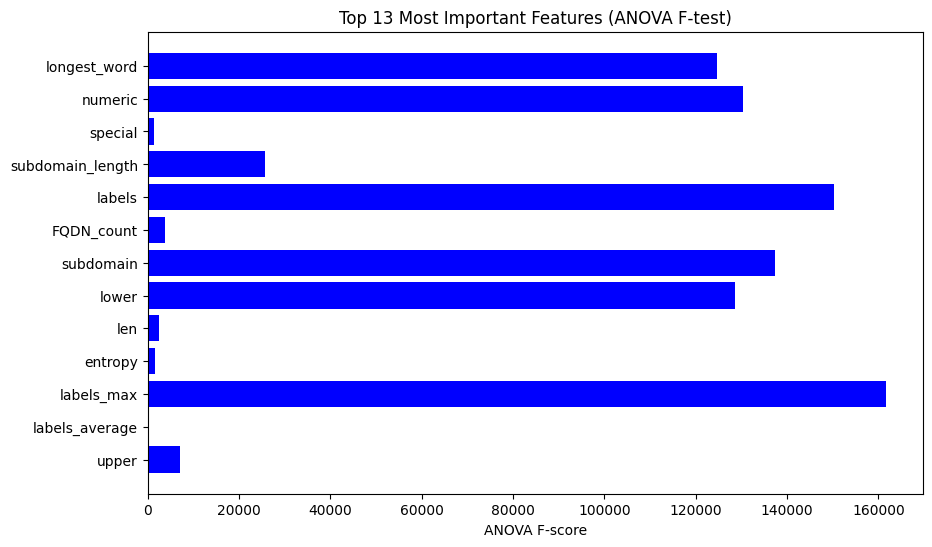

In [16]:
X = data.drop(columns=['Target Attack',"timestamp"])
y = data['Target Attack']
k_best = SelectKBest(f_classif, k='all')
k_best.fit(X, y)
f_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
sorted_feature_names = [x for _, x in sorted(zip(f_scores, selected_feature_names), reverse=True)]
num_features_to_plot = 13
top_feature_names = sorted_feature_names[:num_features_to_plot]
top_f_scores = f_scores[k_best.get_support()][:num_features_to_plot]
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_f_scores, color='blue')
plt.xlabel('ANOVA F-score')
plt.title('Top {} Most Important Features (ANOVA F-test)'.format(num_features_to_plot))
plt.gca().invert_yaxis()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_test = lr_model.predict(X_val)
test_accuracy = accuracy_score(y_val , y_pred_test)
test_accuracy

0.8256403879631933

In [19]:

#mutual info

k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_mutual_info=X_train[selected_feature_names]
X_val_mutual_info=X_val[selected_feature_names]
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_mutual_info, y_train)
y_pred_test = lr_model.predict(X_val_mutual_info)
mutul_info_test_accuracy = accuracy_score(y_val , y_pred_test)
mutul_info_test_accuracy

0.8274061178811241

In [20]:

#chi2

k_best = SelectKBest(chi2, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_chi2=X_train[selected_feature_names]
X_val_chi2=X_val[selected_feature_names]
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_chi2, y_train)
y_pred_test = lr_model.predict(X_val_chi2)
chi2_test_accuracy = accuracy_score(y_val , y_pred_test)
chi2_test_accuracy

0.8257896045759762

In [21]:

#ANOVA

k_best = SelectKBest(f_classif, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_Anova=X_train[selected_feature_names]
X_val_Anova=X_val[selected_feature_names]
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_Anova, y_train)
y_pred_test = lr_model.predict(X_val_Anova)
Anova_test_accuracy = accuracy_score(y_val , y_pred_test)
Anova_test_accuracy

0.8270828152200945

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_mutual_info=X_train[selected_feature_names]
pipeline = Pipeline([

    ('classifier', LogisticRegression(max_iter=1000))
])


param_grid = {

    'classifier__C': [0.01, 0.1, 1],  # Regularization parameter

    'classifier__solver': ['liblinear', 'lbfgs']  # Solver for logistic regression
}



grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_mutual_info, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best Accuracy Score: 0.8240356889082603


In [23]:
#mutual info with grid search
مr_model = LogisticRegression(max_iter=1000,C=0.1, solver = 'liblinear')
k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_mutual_info=X_train[selected_feature_names]
X_test_info=X_test[selected_feature_names]

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_mutual_info, y_train)
y_pred_test = lr_model.predict(X_test_info)
mutul_info_test_accuracy_lr = accuracy_score(y_test , y_pred_test)
mutul_info_test_accuracy_lr

0.8216115394180552

In [24]:

# Create a function to perform feature selection and model evaluation
def evaluate_feature_selection(X_train, X_val, y_train, y_val, feature_selection_method):
    # Feature selection
    k_best = SelectKBest(feature_selection_method, k=8)
    k_best.fit(X_train, y_train)
    selected_feature_names = X.columns[k_best.get_support()]
    X_train_selected = X_train[selected_feature_names]
    X_val_selected = X_val[selected_feature_names]

    # Train a Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_selected, y_train)

    # Evaluate the model on the validation set
    y_pred_val = rf_model.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred_val)

    return accuracy

# Evaluate with mutual information feature selection
mutual_info_accuracy = evaluate_feature_selection(X_train, X_val, y_train, y_val, mutual_info_classif)

# Evaluate with chi-squared feature selection
chi2_accuracy = evaluate_feature_selection(X_train, X_val, y_train, y_val, chi2)

# Evaluate with ANOVA feature selection
anova_accuracy = evaluate_feature_selection(X_train, X_val, y_train, y_val, f_classif)

print("Mutual Info Accuracy:", mutual_info_accuracy)
print("Chi-squared Accuracy:", chi2_accuracy)
print("ANOVA Accuracy:", anova_accuracy)


Mutual Info Accuracy: 0.8293210644118378
Chi-squared Accuracy: 0.8290972394926636
ANOVA Accuracy: 0.8290972394926636


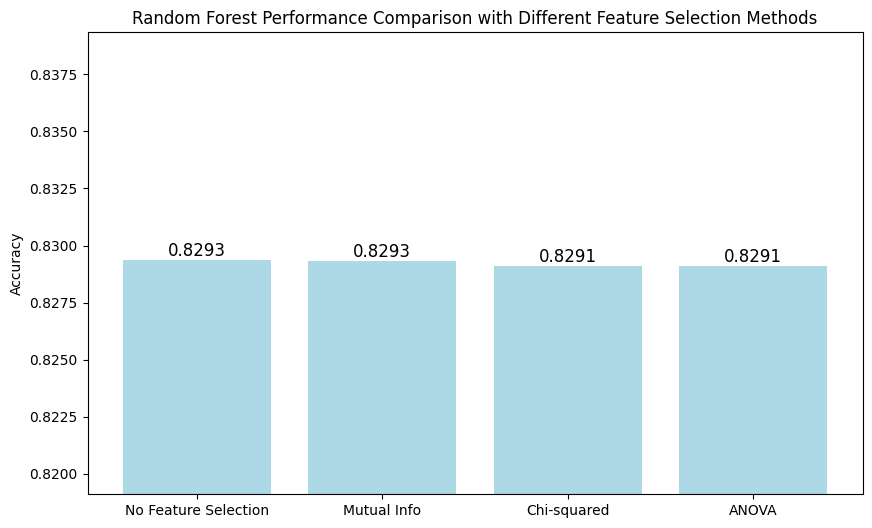

In [25]:

# Calculate the accuracy on the full dataset without feature selection
rf_model_full = RandomForestClassifier(random_state=42)
rf_model_full.fit(X_train, y_train)
y_pred_val_full = rf_model_full.predict(X_val)
accuracy_full = accuracy_score(y_val, y_pred_val_full)
# Create a bar plot to compare the results
methods = ['No Feature Selection', 'Mutual Info', 'Chi-squared', 'ANOVA']
accuracies = [accuracy_full, mutual_info_accuracy, chi2_accuracy, anova_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color='lightblue')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance Comparison with Different Feature Selection Methods')
plt.ylim([min(accuracies) - 0.01, max(accuracies) + 0.01])

# Annotate the bars with their respective accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [26]:

k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_mutual_info=X_train[selected_feature_names]
# Define the Random Forest model with feature selection
rf_model = RandomForestClassifier(random_state=42)


# Create a pipeline with the feature selection and the Random Forest model
pipeline = Pipeline([

    ('classifier', rf_model)
])

# Define the hyperparameters and their values to search
param_grid = {

    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_mutual_info, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Best Accuracy Score: 0.8257090535481943


In [27]:
k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X, y)
feature_scores = k_best.scores_
selected_feature_names = X.columns[k_best.get_support()]
X_train_mutual_info=X_train[selected_feature_names]
X_test_info=X_test[selected_feature_names]
# Define the Random Forest model with feature selection
rf_model = RandomForestClassifier(random_state=42,max_depth= None, n_estimators= 50)
rf_model.fit(X_train_mutual_info, y_train)
y_pred_test = rf_model.predict(X_test_info)
mutul_info_test_accuracy_rf = accuracy_score(y_test , y_pred_test)
mutul_info_test_accuracy_rf

0.8238000497388709

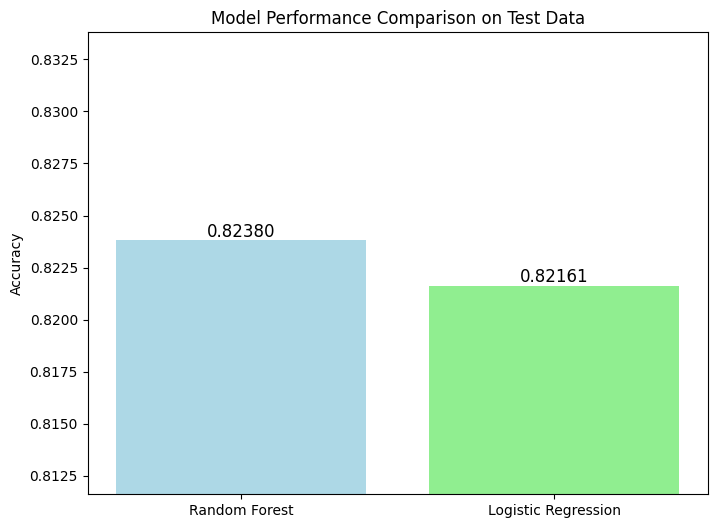

In [28]:
# Create a bar plot to compare the results
models = ['Random Forest', 'Logistic Regression']
accuracies = [mutul_info_test_accuracy_rf, mutul_info_test_accuracy_lr]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['lightblue', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison on Test Data')
plt.ylim([min(accuracies) - 0.01, max(accuracies) + 0.01])

# Annotate the bars with their respective accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.5f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [29]:
# Define the feature selection method (mutual info with k=8)
feature_selection = SelectKBest(mutual_info_classif, k=8)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42,max_depth= None, n_estimators= 50)

# Create the pipeline with feature selection followed by the Random Forest classifier
# add  minmaxscaler
pipeline = Pipeline([
    ('feature_selection', feature_selection),
    ('classifier', rf_classifier)
])
pipeline.fit(X_train, y_train)



Pipeline(steps=[('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x7ff9e6924d60>)),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [30]:
import pickle
#
model_filename = 'model.pkl'

pickle.dump(pipeline, open(model_filename, 'wb'))
print(f"Model fitted and saved as {model_filename}")

Model fitted and saved as model.pkl


In [31]:
xx=pickle.load(open('model.pkl', 'rb'))